# 为什么对冲策略风险更大？

#
<!-- 市场方向性风险：如果对冲策略预测错误，如对冲的资产与主要投资资产的相关性突然改变，这可能导致预期外的损失。

杠杆效应：一些对冲策略通过使用杠杆来放大潜在收益，但同时也放大了潜在损失。

流动性风险：在极端市场条件下，某些对冲策略可能难以及时执行，特别是涉及到流动性较低的衍生品或资产。 -->





---
### 因子实战 第三集 
# 打造自己的对冲基金：用Python实现对冲策略

##### “我不知道未来会发生什么，但我知道我会在那里等着它” - 沃伦·巴菲特

### 🎬 @大导演哈罗德
### 🏛 香港中文大学 金融工程 本科
### 📈 即将前往美国金融工程硕士之路（已经获得录取）
### 🌐 [关注我的Bilibili，看所有人都能听得懂有收获的量化学习内容！](https://space.bilibili.com/629573485)

🌟🌟🌟 一起揭开量化的神秘面纱！#哈罗德的亮化频道🌟


---

读取数据

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
df_mkt = pd.read_excel('Monthly_Market_Value_and_Return.xlsx', index_col=0) 
df_mkt.reset_index(inplace=True)

In [4]:
df_mkt['stock'] = df_mkt['stock'].map(lambda x: str(x).zfill(6))
df_mkt

,stock,date,value_in_thousand,monthly_return,next_month_return
0,000001,2005-12,11947347.99,0.051370,0.034202
1,000001,2006-01,12355970.65,0.034202,0.077165
2,000001,2006-02,13309423.50,0.077165,-0.068713
3,000001,2006-03,12394887.09,-0.068713,0.237049
4,000001,2006-04,15333078.53,0.237049,0.114213
...,...,...,...,...,...
419256,605599,2021-11,9636666.94,0.061697,0.086360
419257,605599,2021-12,10468889.19,0.086360,-0.116642
419258,605599,2022-01,9247778.04,-0.116642,0.105971
419259,605599,2022-02,10227778.07,0.105971,-0.170342


In [5]:
df = df_mkt
unique_dates = df['date'].unique()
unique_dates.sort()

---

先用一个简单的对冲方案，我们相信小市值的股票比大市值的具有投资价值，于是我们购买市场最小的1%的股票，看空市场最大的1%的股票，这样我们就构造了一个对冲组合。

这个组合的beta应该接近于0，也就是说这个组合的收益率应该与市场无关，那么我们就可以用这个组合来对冲掉市场的beta风险，从而获得一个alpha策略。

所以我们也叫这个策略为中性组合策略（market neutral strategy）或者对冲策略（hedged strategy）。

---

In [6]:
long_percentile = 1
short_percentile = 99

strategy_returns = []

for date in unique_dates:

    df_date = df[df['date'] == date]

    long_threshold = np.percentile(df_date['value_in_thousand'], long_percentile)
    short_threshold = np.percentile(df_date['value_in_thousand'], short_percentile)


    long_stocks = df_date[df_date['value_in_thousand'] <= long_threshold]['stock']

    short_stocks = df_date[df_date['value_in_thousand'] >= short_threshold]['stock']

    df_long_stock = df_date[df_date['stock'].isin(long_stocks)]
    df_short_stock = df_date[df_date['stock'].isin(short_stocks)]


    # 这里有一个小重点！我要的是下个月的收益，我利用这个月月末的市值，构建投资组合，那么，我的组合收益是下一个月的收益。
    long_return = df_long_stock['next_month_return'].mean()
    short_return = df_short_stock['next_month_return'].mean()

    strategy_return = long_return - short_return
    strategy_returns.append(strategy_return)


直观的图形

In [7]:
unique_dates_nochange = unique_dates.copy()
unique_dates = [datetime.strptime(date, "%Y-%m") for date in unique_dates]

/var/folders/md/wt8g61857ld_20f_r6rn4nk40000gn/T/ipykernel_3082/1729998692.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


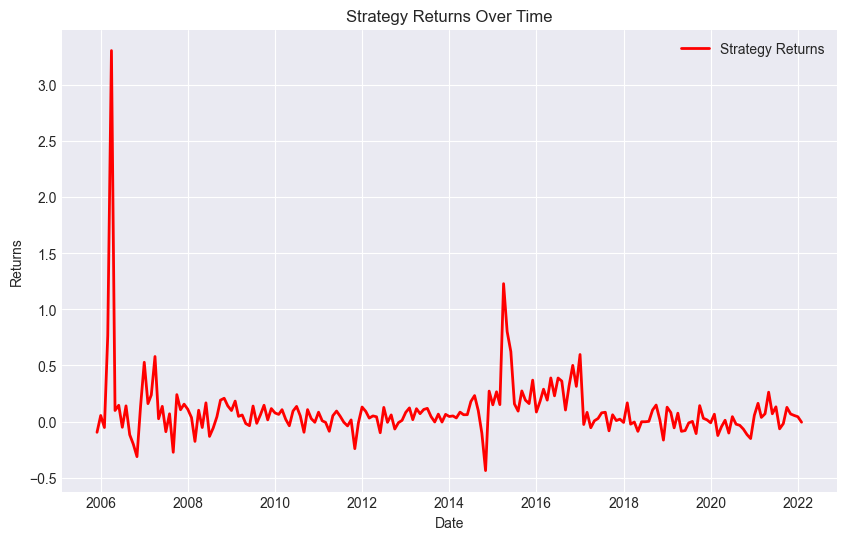

,0
count,195.000000
mean,0.095424
std,0.293792
min,-0.436197
25%,-0.007169
50%,0.059759
75%,0.135594
max,3.304420


In [8]:
plt.style.use('seaborn-darkgrid')  
plt.figure(figsize=(10, 6)) 
plt.plot(unique_dates, strategy_returns, label='Strategy Returns', color='red', linewidth=2)
plt.title('Strategy Returns Over Time')  # 添加标题
plt.xlabel('Date')  # 添加x轴标签
plt.ylabel('Returns')  # 添加y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格线
plt.show()
pd.DataFrame(strategy_returns).describe()

/var/folders/md/wt8g61857ld_20f_r6rn4nk40000gn/T/ipykernel_3082/3806968952.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


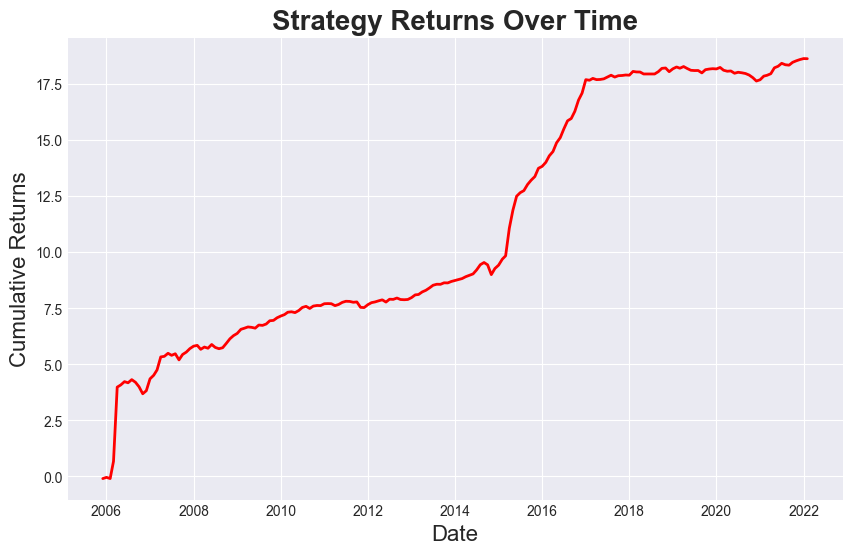

array([-0.09524521, -0.04067029, -0.09339514,  0.67342514,  3.97784557,
        4.07698857,  4.2225585 ,  4.17204879,  4.3121555 ,  4.19533971,
        3.9947545 ,  3.68266736,  3.81852179,  4.34693043,  4.5069975 ,
        4.74426307,  5.323987  ,  5.34945243,  5.4852365 ,  5.39546779,
        5.46509766,  5.19193752,  5.43222886,  5.53774226,  5.69307712,
        5.80244639,  5.83860832,  5.66240552,  5.76357872,  5.71103439,
        5.87809102,  5.7464042 ,  5.6897417 ,  5.73317452,  5.92426902,
        6.13242183,  6.27257539,  6.37118702,  6.55366589,  6.60052952,
        6.65951402,  6.64192389,  6.60564364,  6.74416983,  6.72888495,
        6.78987127,  6.93539214,  6.95103808,  7.0670782 ,  7.14446926,
        7.20862826,  7.31486391,  7.33449749,  7.29735988,  7.39138294,
        7.52678766,  7.57750838,  7.48269388,  7.58939216,  7.61575469,
        7.60959563,  7.693547  ,  7.70038132,  7.69374763,  7.60768079,
        7.66021348,  7.75425288,  7.80263048,  7.79672283,  7.75

In [9]:
cumulated_returns = np.cumsum(strategy_returns)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(unique_dates, cumulated_returns, label='Strategy  the cumulative returns', color='red', linewidth=2)
plt.title('Strategy Returns Over Time', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=16)
plt.grid(True)
plt.show()
cumulated_returns

---
# 我们现在还有什么需要考虑？
## 有没有什么可能的问题？这种选股的策略是不是太过于激进？我们能不能得到一些对市场所有股票都适用的结论？

---

In [10]:
# 初始化每个组合的回报列表
portfolio_returns = {f'portfolio_{i}': [] for i in range(1, 6)}

for date in unique_dates_nochange:


    df_date = df[df['date'] == date]
    
    # 检查df_date是否为空
    if df_date.empty:
        # 如果为空，则跳过当前日期
        continue
    
    # 获取五个分位数的阈值
    thresholds = np.percentile(df_date['value_in_thousand'], [20, 40, 60, 80, 100])
    
    # 构建五个组合
    for i in range(5):
        if i == 0:
            # 第一个组合从最小值开始
            portfolio = df_date[df_date['value_in_thousand'] <= thresholds[i]]
        else:
            # 后续组合介于两个阈值之间
            portfolio = df_date[(df_date['value_in_thousand'] > thresholds[i-1]) & (df_date['value_in_thousand'] <= thresholds[i])]
        
        # 如果组合为空，则继续下一个循环
        if portfolio.empty:
            portfolio_return = 0  # 或者你可以选择跳过这个组合
        else:
            # 这里我还是看的下一个月的收益
            if not np.isnan(portfolio['next_month_return'].mean()):
                portfolio_return = portfolio['next_month_return'].mean()

        portfolio_returns[f'portfolio_{i+1}'].append(portfolio_return)


In [11]:
# 对冲组合的回报是买入第一个组合并卖空第五个组合的回报差
hedge_returns = []
for i in range(len(portfolio_returns['portfolio_1'])):
    hedge_return = portfolio_returns['portfolio_1'][i] - portfolio_returns['portfolio_5'][i]
    hedge_returns.append(hedge_return)

# 输出每个组合的平均回报
average_returns = {portfolio: np.mean(returns) for portfolio, returns in portfolio_returns.items()}
average_hedge_return = np.mean(hedge_returns)

# 打印结果
print("Average Returns by Portfolio:")
for portfolio, average_return in average_returns.items():
    print(f"{portfolio}: {average_return}")

print(f"Average Hedge Return: {average_hedge_return}")

Average Returns by Portfolio:
portfolio_1: 0.03632338665770842
portfolio_2: 0.0209551217564462
portfolio_3: 0.01726534987882018
portfolio_4: 0.014766130366628655
portfolio_5: 0.012561872521888598
Average Hedge Return: 0.023761514135819815


In [12]:
# Calculate the cumulative returns for each portfolio
cumulative_portfolio_returns = {portfolio: np.cumsum(returns) for portfolio, returns in portfolio_returns.items()}
# Calculate the cumulative hedge returns
cumulative_hedge_returns = np.cumsum(hedge_returns)
# Get the final cumulative return for each portfolio and the hedge strategy
final_cumulative_returns = {portfolio: returns[-1] if len(returns) > 0 else 0 for portfolio, returns in cumulative_portfolio_returns.items()}
final_cumulative_hedge_return = cumulative_hedge_returns[-1] if len(cumulative_hedge_returns) > 0 else 0
# Print the final cumulative returns by portfolio
print("Final Cumulative Returns by Portfolio:")
for portfolio, final_return in final_cumulative_returns.items():
    print(f"{portfolio}: {final_return}")
# Print the final cumulative hedge return
print(f"Final Cumulative Hedge Return: {final_cumulative_hedge_return}")


Final Cumulative Returns by Portfolio:
portfolio_1: 7.119383784910844
portfolio_2: 4.107203864263453
portfolio_3: 3.3840085762487546
portfolio_4: 2.894161551859217
portfolio_5: 2.4621270142901657
Final Cumulative Hedge Return: 4.657256770620686


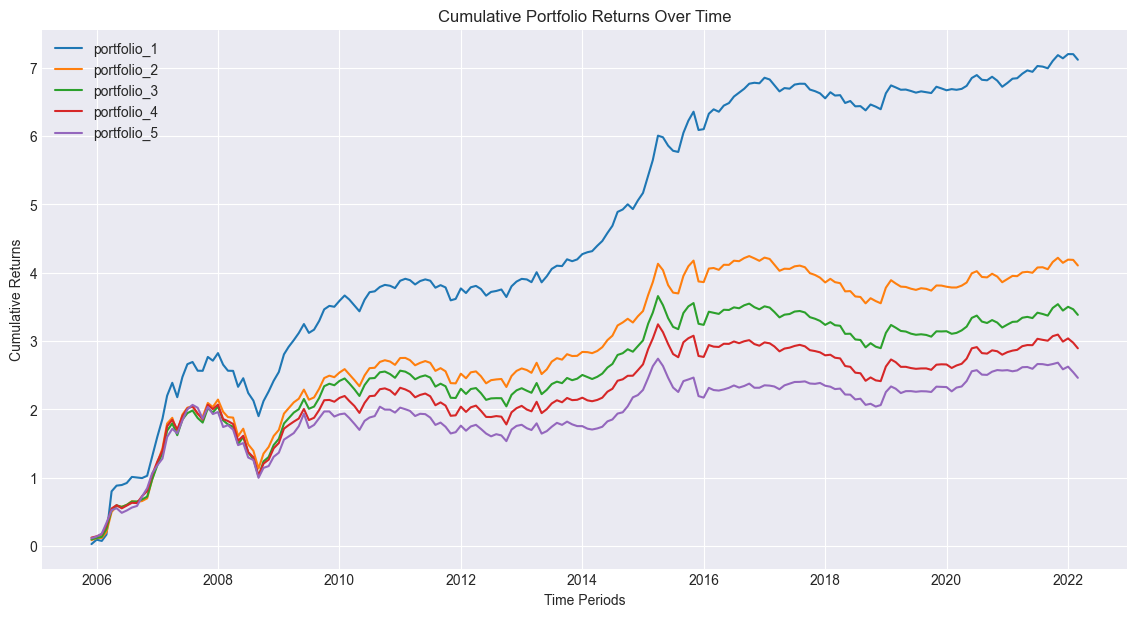

In [14]:
# Calculate the cumulative returns for each portfolio
cumulative_portfolio_returns = {portfolio: np.cumsum(returns) for portfolio, returns in portfolio_returns.items()}

# Plotting the cumulative returns for each portfolio
plt.figure(figsize=(14, 7))  # Set the figure size

for portfolio, returns in cumulative_portfolio_returns.items():
    plt.plot(unique_dates, returns, label=portfolio)

plt.title('Cumulative Portfolio Returns Over Time')
plt.xlabel('Time Periods')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

---

# 因子...?

你哈罗德不是说，可以根据一个因子确定一个股票的涨跌吗？

---

哈罗德双因子

In [31]:
SMB_monthly = pd.DataFrame(hedge_returns, unique_dates_nochange,columns=['SMB_monthly'])

pd.DataFrame(hedge_returns, unique_dates_nochange,columns=['SMB_monthly'])

,SMB_monthly
2005-12,-0.084707
2006-01,0.038873
2006-02,-0.061813
2006-03,-0.063103
2006-04,0.445650
...,...
2021-11,0.064914
2021-12,0.050056
2022-01,0.023067
2022-02,0.080904


In [50]:
df_mkt

,stock,date,value_in_thousand,monthly_return,next_month_return
0,000001,2005-12,11947347.99,0.051370,0.034202
1,000001,2006-01,12355970.65,0.034202,0.077165
2,000001,2006-02,13309423.50,0.077165,-0.068713
3,000001,2006-03,12394887.09,-0.068713,0.237049
4,000001,2006-04,15333078.53,0.237049,0.114213
...,...,...,...,...,...
419256,605599,2021-11,9636666.94,0.061697,0.086360
419257,605599,2021-12,10468889.19,0.086360,-0.116642
419258,605599,2022-01,9247778.04,-0.116642,0.105971
419259,605599,2022-02,10227778.07,0.105971,-0.170342


In [62]:
MKT = df_mkt.groupby('date')['monthly_return'].mean()
MKT_monthly = pd.DataFrame(MKT)
MKT_monthly

,monthly_return
date,
2005-12,0.027441
2006-01,0.088975
2006-02,0.032761
2006-03,0.011739
2006-04,0.088626
...,...
2021-11,0.081611
2021-12,0.048813
2022-01,-0.082702


date
2005-12    0.027441
2006-01    0.088975
2006-02    0.032761
2006-03    0.011739
2006-04    0.088626
             ...   
2021-11    0.081611
2021-12    0.048813
2022-01   -0.082702
2022-02    0.049878
2022-03   -0.037078
Name: monthly_return, Length: 196, dtype: float64

现在我们有了每个月的 MKT factor 和 SMB factor 的值
### 对于任何一个股票，这个股票每个月的收益，我可以分解为 R = A1 * MKT factor + A2 * SMB factor + alpha

In [58]:
test_stock_code = '600000' #浦发银行

test_stock = df_mkt[df_mkt['stock'] == test_stock_code]
test_stock

,stock,date,value_in_thousand,monthly_return,next_month_return
208370,600000,2005-12,3.817125e+07,0.106697,0.155897
208371,600000,2006-01,4.412205e+07,0.155897,0.081633
208372,600000,2006-02,4.772385e+07,0.081633,-0.109106
208373,600000,2006-03,4.251690e+07,-0.109106,0.209055
208374,600000,2006-05,3.903255e+07,0.209055,-0.006018
...,...,...,...,...,...
208560,600000,2021-11,2.497869e+08,-0.048098,0.002350
208561,600000,2021-12,2.503740e+08,0.002350,-0.014068
208562,600000,2022-01,2.468517e+08,-0.014068,-0.002378
208563,600000,2022-02,2.462647e+08,-0.002378,-0.046484


In [72]:
X = pd.concat([SMB_monthly['SMB_monthly'], MKT_monthly['monthly_return']],axis= 1)
X

,SMB_monthly,monthly_return
2005-12,-0.084707,0.027441
2006-01,0.038873,0.088975
2006-02,-0.061813,0.032761
2006-03,-0.063103,0.011739
2006-04,0.445650,0.088626
...,...,...
2021-11,0.064914,0.081611
2021-12,0.050056,0.048813
2022-01,0.023067,-0.082702
2022-02,0.080904,0.049878


In [74]:
# regression on next_month_return on SMB
import statsmodels.api as sm
from statsmodels import regression

test_stock.fillna(0, inplace=True)

# X = SMB_monthly['SMB_monthly'],MKT_monthly['monthly_return']
y = test_stock[['date','next_month_return']].set_index('date')

data_for_stock = test_stock['date'].unique()
data_for_stock.sort()
y = y.loc[data_for_stock]
X = X.loc[data_for_stock]

X = sm.add_constant(X)
model = regression.linear_model.OLS(y, X).fit()
alpha = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
print('alpha: ' + str(alpha))
print('beta SMB: ' + str(beta1))
print('beta MKT: ' + str(beta2))
print(model.summary())

alpha: 0.020873707410296646
beta SMB: -0.39489463362000604
beta MKT: 0.1579142085592274
                            OLS Regression Results                            
Dep. Variable:      next_month_return   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.808
Date:                Mon, 15 Jan 2024   Prob (F-statistic):            0.00356
Time:                        01:03:14   Log-Likelihood:                 170.73
No. Observations:                 195   AIC:                            -335.5
Df Residuals:                     192   BIC:                            -325.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/var/folders/md/wt8g61857ld_20f_r6rn4nk40000gn/T/ipykernel_3082/3881599940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_stock.fillna(0, inplace=True)
/var/folders/md/wt8g61857ld_20f_r6rn4nk40000gn/T/ipykernel_3082/3881599940.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]
/var/folders/md/wt8g61857ld_20f_r6rn4nk40000gn/T/ipykernel_3082/3881599940.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

---

# 三因子，还有....

---

In [18]:
df_pb = pd.read_excel('Monthly_PB_and_Return.xlsx', index_col=0)
df_pb.reset_index(inplace=True)
df_pb['stock'] = df_pb['stock'].map(lambda x: str(x).zfill(6))
df_pb

,stock,name,date,return,PB,next_month_return
0,600000.SH,浦发银行,2005-12-30,10.6697,2.5770,15.5897
1,600000.SH,浦发银行,2006-01-25,15.5897,2.9788,8.1633
2,600000.SH,浦发银行,2006-02-28,8.1633,3.2219,-10.9106
3,600000.SH,浦发银行,2006-03-31,-10.9106,2.8704,0.0000
4,600000.SH,浦发银行,2006-04-28,0.0000,2.8704,20.9181
...,...,...,...,...,...,...
419985,003816.SZ,中国广核,2021-11-30,-0.6849,1.4650,7.9310
419986,003816.SZ,中国广核,2021-12-31,7.9310,1.5812,-7.9872
419987,003816.SZ,中国广核,2022-01-28,-7.9872,1.4549,2.0833
419988,003816.SZ,中国广核,2022-02-28,2.0833,1.4852,-7.1429


In [25]:
df = df_pb.copy()
df['book_to_market'] = 1 / df['PB']
df

,stock,name,date,return,PB,next_month_return,book_to_market
0,600000.SH,浦发银行,2005-12-30,10.6697,2.5770,15.5897,0.388048
1,600000.SH,浦发银行,2006-01-25,15.5897,2.9788,8.1633,0.335706
2,600000.SH,浦发银行,2006-02-28,8.1633,3.2219,-10.9106,0.310376
3,600000.SH,浦发银行,2006-03-31,-10.9106,2.8704,0.0000,0.348384
4,600000.SH,浦发银行,2006-04-28,0.0000,2.8704,20.9181,0.348384
...,...,...,...,...,...,...,...
419985,003816.SZ,中国广核,2021-11-30,-0.6849,1.4650,7.9310,0.682594
419986,003816.SZ,中国广核,2021-12-31,7.9310,1.5812,-7.9872,0.632431
419987,003816.SZ,中国广核,2022-01-28,-7.9872,1.4549,2.0833,0.687332
419988,003816.SZ,中国广核,2022-02-28,2.0833,1.4852,-7.1429,0.673310


# TODO: 利用Book to Market Ratio构建投资组合

# 如何在中国市场复现Fama-French三因子模型？

### 参考：liu+stambagh+yu+2019